Pregunta 1 -  Hineill Davida Céspedes Espinoza

IDENTIFICACIÓN DE SISTEMAS 

En este problema vamos a aplicar las técnicas aprendidas en el curso para la identificación de
algunos sistemas desconocidos. Por cada sistema desconocido van a ser proporcionadas secuencias
de entrada x[n] y de salida y[n].

Caso 1 - Sistema lineal e invariante en el tiempo (LTI - Linear Time Invariant)

Dado un sistema LTI con respuesta impulsiva h[n], la relación entre la entrada y la salida
del sistema están dadas por
y[n] =
Xn
k=−∞
x[k]h[n − k] + w[n]
donde w[n] es una señal de ruido blanco gaussiano con media cero y varianza desconocida.
Utilizar un filtro FIR de longitud 10 (es decir con 10 coeficientes) para identificar el sistema.

RESPUESTA : Implementaremos un filtro wiener y LMS para reconocer las características de la respuesta al impulso del sistema y caracterizandolo. 

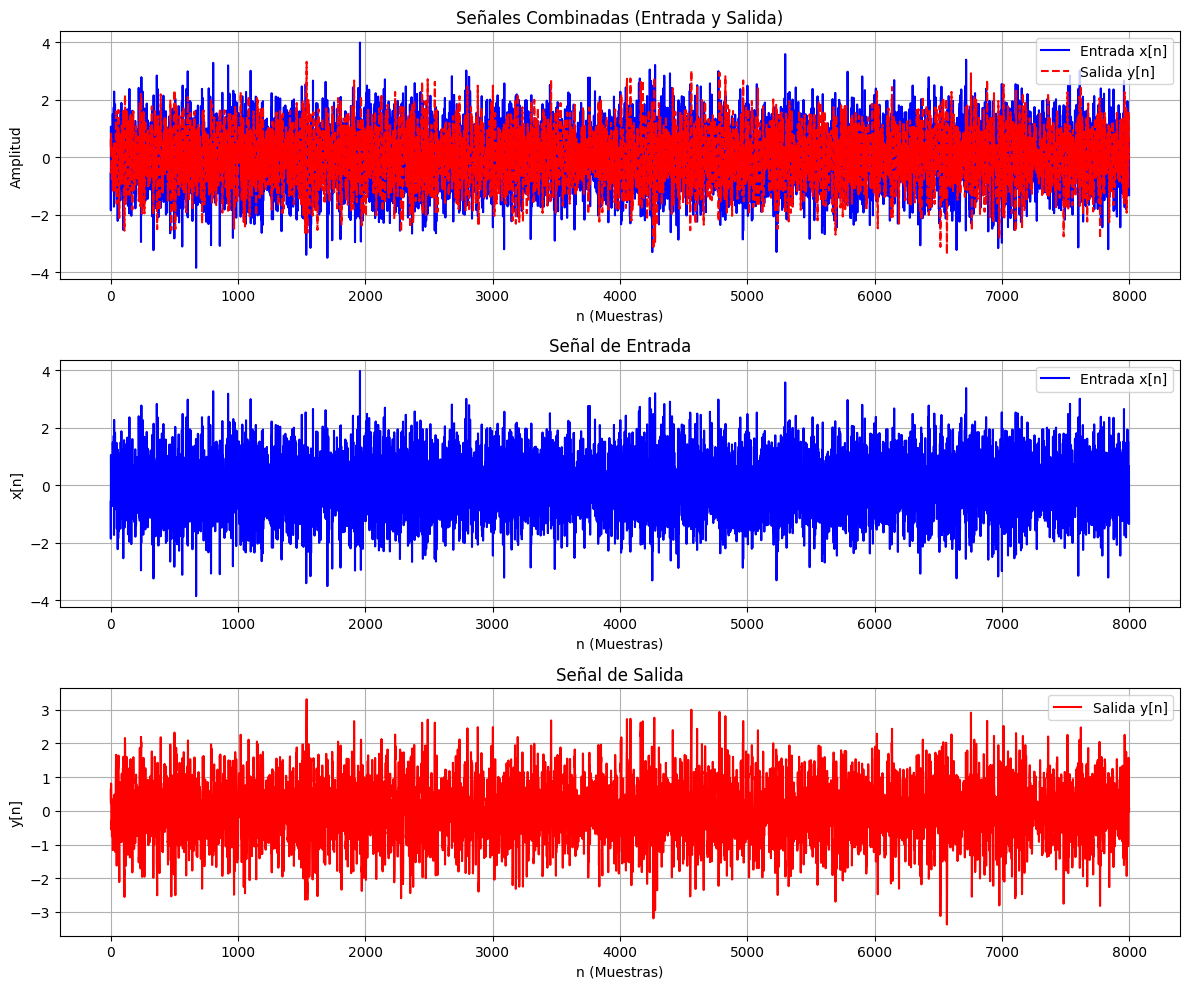

In [3]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.linalg import toeplitz
#Cargar datos del archivo CSV
datos  = ''
with open('lti.csv', newline='') as f:
    data =  csv.reader(f, delimiter=" ")
    datos=list(data)
input_lti = datos[0]
output_lti = datos[1]
# Convertir los datos de input y output en arrays de tipo float
input_lti = np.array(input_lti, dtype=float)  
output_lti = np.array(output_lti, dtype=float)
# Crear un vector de tiempo (asume índices desde 0 hasta N-1)
n = np.arange(len(input_lti))
# Crear las gráficas
plt.figure(figsize=(12, 10))
# Gráfica 1: Señales combinadas (Entrada y Salida juntas)
plt.subplot(3, 1, 1)  # Primera gráfica (3 filas, 1 columna, posición 1)
plt.plot(n, input_lti, label='Entrada x[n]', color='blue')
plt.plot(n, output_lti, label='Salida y[n]', color='red', linestyle='--')
plt.title('Señales Combinadas (Entrada y Salida)')
plt.xlabel('n (Muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
# Gráfica 2: Señal de Entrada x[n] (separada)
plt.subplot(3, 1, 2)  # Segunda gráfica (3 filas, 1 columna, posición 2)
plt.plot(n, input_lti, label='Entrada x[n]', color='blue')
plt.title('Señal de Entrada')
plt.xlabel('n (Muestras)')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
# Gráfica 3: Señal de Salida y[n] (separada)
plt.subplot(3, 1, 3)  # Tercera gráfica (3 filas, 1 columna, posición 3)
plt.plot(n, output_lti, label='Salida y[n]', color='red')
plt.title('Señal de Salida')
plt.xlabel('n (Muestras)')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
# Mostrar todas las gráficas
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


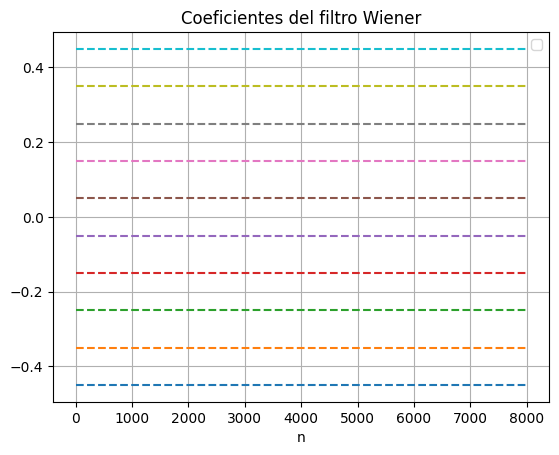

In [6]:
import scipy as sc
M = 10
N = len(input_lti)

# Matriz Rx 
Rx = np.zeros((M, M))
rx = np.zeros(M)

for k in range(M):
    rx[k] = np.sum(input_lti[k:] * input_lti[:N-k]) / N
for i in range(M):
    for j in range(M):
        Rx[i,j] = rx[np.abs(i-j)]

# Vector rdx = rd
rdx = np.zeros(M)
for k in range(M):
    rdx[k] = np.sum(output_lti[k:] * input_lti[:N-k]) / N

# Calculamos los coeficientes del filtro Wiener
W = np.dot(np.linalg.inv(Rx),rdx)

# ploteamos los coeficientes del filtro wiener
plt.figure()
for i in range(M):
    plt.plot([0,N],[W[i],W[i]], linestyle="--")
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficientes del filtro Wiener')
plt.legend()

Error medio cuadrático:  0.0018240399151444014


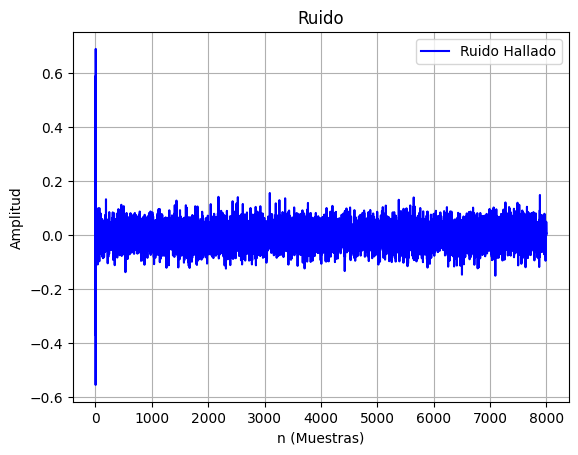

In [22]:
salida_aproximada = sc.signal.lfilter(W,[1],input_lti) #Libre de ruido
print('Error medio cuadrático: ',np.mean((output_lti-salida_aproximada)**2))
ruido = salida_aproximada - output_lti
plt.plot( ruido, label='Ruido Hallado', color='blue')
plt.title('Ruido')
plt.xlabel('n (Muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

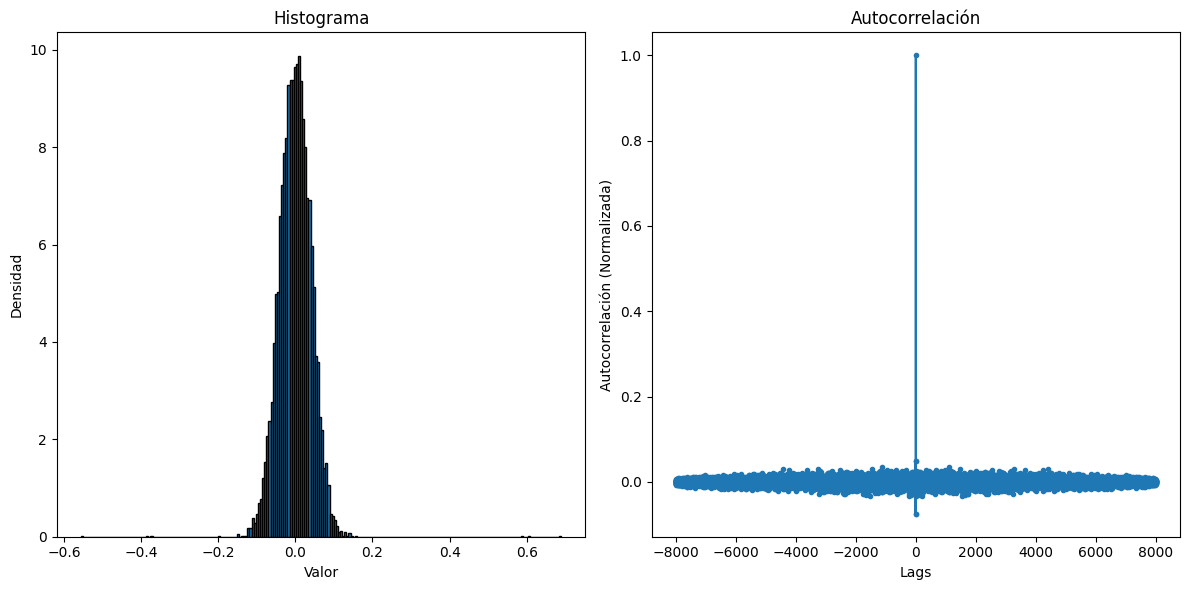

In [ ]:
def calcular_histograma_y_autocorrelacion(arreglo):
    """
    Calcula y grafica el histograma y la autocorrelación de un arreglo.

    Args:
        arreglo (numpy.ndarray): Arreglo de datos numéricos.

    """
    # Calcular histograma
    valores_hist, bins_hist = np.histogram(arreglo, bins='auto', density=True)

    # Calcular autocorrelación
    autocorrelacion = np.correlate(arreglo - np.mean(arreglo), arreglo - np.mean(arreglo), mode='full')
    autocorrelacion = autocorrelacion / autocorrelacion.max()  # Normalización
    lags = np.arange(-len(arreglo) + 1, len(arreglo))

    # Crear gráficos
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    plt.bar(bins_hist[:-1], valores_hist, width=np.diff(bins_hist), edgecolor='black', align='edge')
    plt.title('Histograma de los valores de ruido')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')

    # Autocorrelación
    plt.subplot(1, 2, 2)
    plt.plot(lags, autocorrelacion, marker='o', linestyle='-', markersize=3)
    plt.title('Autocorrelación del error hallado - Ruido')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelación (Normalizada)')

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()
calcular_histograma_y_autocorrelacion(ruido)


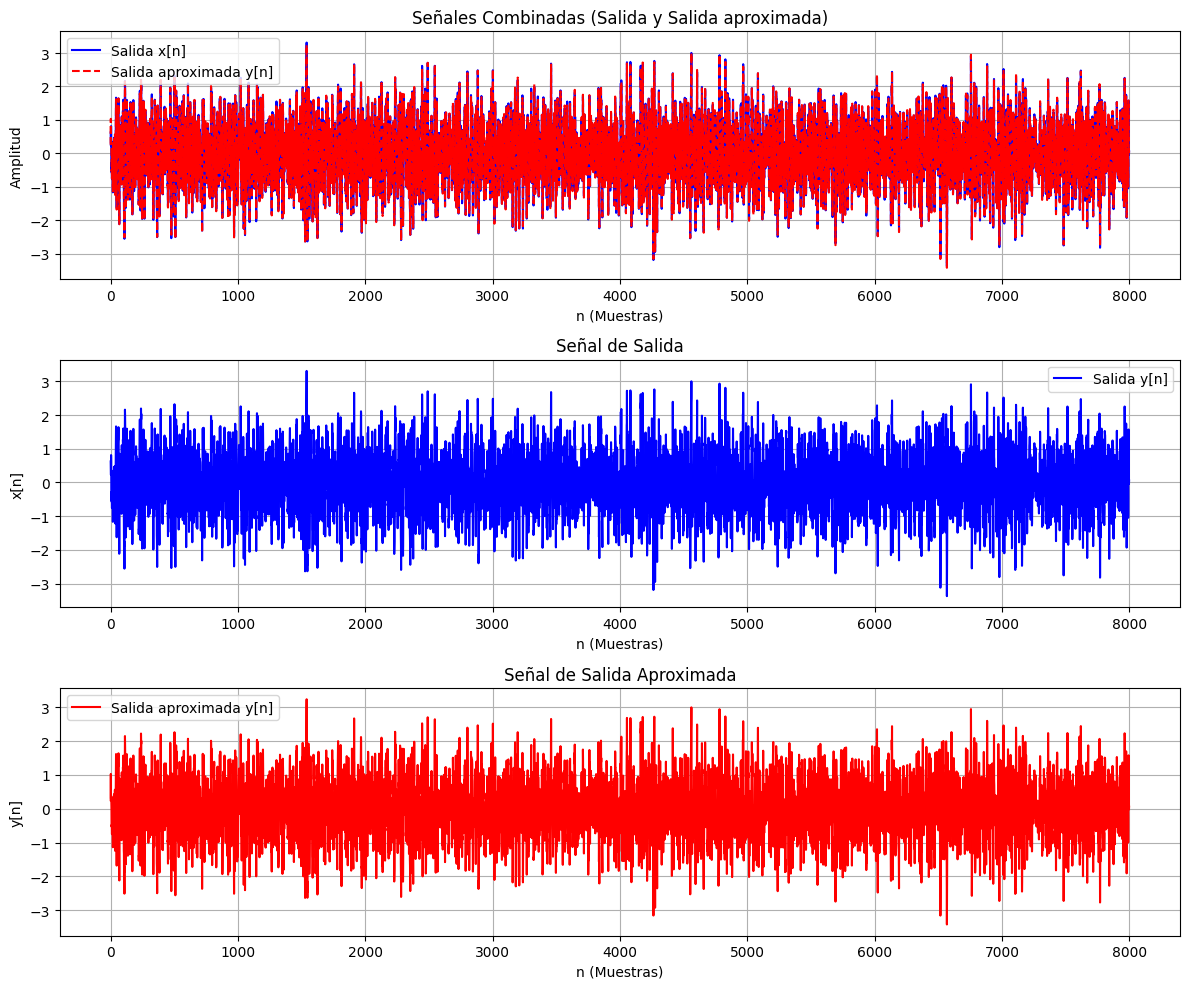

In [18]:
#Graficar señales recuperadas
n = np.arange(len(input_lti))
# Crear las gráficas
plt.figure(figsize=(12, 10))
# Gráfica 1: Señales combinadas (Entrada y Salida juntas)
plt.subplot(3, 1, 1)  # Primera gráfica (3 filas, 1 columna, posición 1)
plt.plot(n, output_lti, label='Salida x[n]', color='blue')
plt.plot(n, salida_aproximada, label='Salida aproximada y[n]', color='red', linestyle='--')
plt.title('Señales Combinadas (Salida y Salida aproximada)')
plt.xlabel('n (Muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
# Gráfica 2: Señal de Entrada x[n] (separada)
plt.subplot(3, 1, 2)  # Segunda gráfica (3 filas, 1 columna, posición 2)
plt.plot(n, output_lti, label='Salida y[n]', color='blue')
plt.title('Señal de Salida')
plt.xlabel('n (Muestras)')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
# Gráfica 3: Señal de Salida y[n] (separada)
plt.subplot(3, 1, 3)  # Tercera gráfica (3 filas, 1 columna, posición 3)
plt.plot(n, salida_aproximada, label='Salida aproximada y[n]', color='red')
plt.title('Señal de Salida Aproximada')
plt.xlabel('n (Muestras)')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
# Mostrar todas las gráficas
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


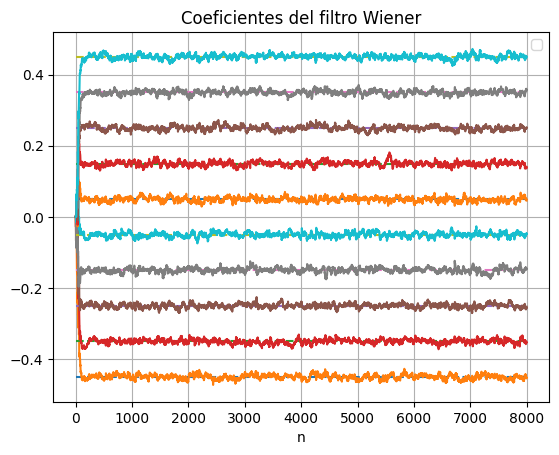

In [31]:
#EVALUANDO LMS
M = 10
N = len(input_lti)
h_LMS = np.zeros((M,N))
d_LMS = np.zeros(N)
mu = 0.02
xx = np.zeros(M)
for n in range(N-1):
    xx = np.roll(xx,1)
    xx[0] = input_lti[n]
    d_LMS[n] = np.dot(h_LMS[:,n],xx)
    en = output_lti[n] - d_LMS[n]
    h_LMS[:,n+1] = h_LMS[:,n] + 2 * mu * en * xx
    
plt.figure()
for i in range(M):
    plt.plot([0,N],[W[i],W[i]], linestyle="--")
    plt.plot(h_LMS[i,:])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficientes del filtro Wiener')
plt.legend()

Error medio cuadrático:  0.003745329977782019


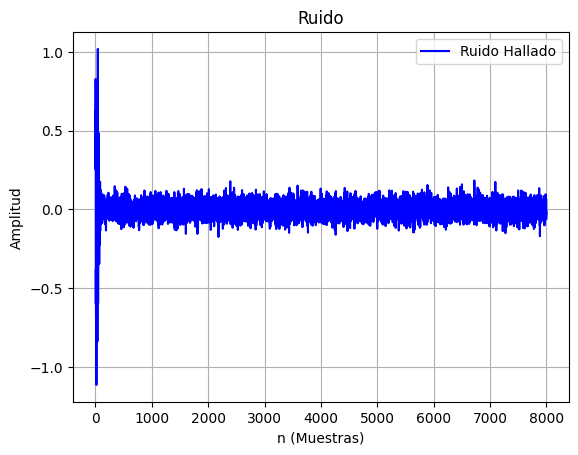

In [32]:
#Calcular Error 
print('Error medio cuadrático: ',np.mean((output_lti-d_LMS)**2))
ruido_LMS = output_lti - d_LMS
plt.plot( ruido_LMS, label='Ruido Hallado', color='blue')
plt.title('Ruido')
plt.xlabel('n (Muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

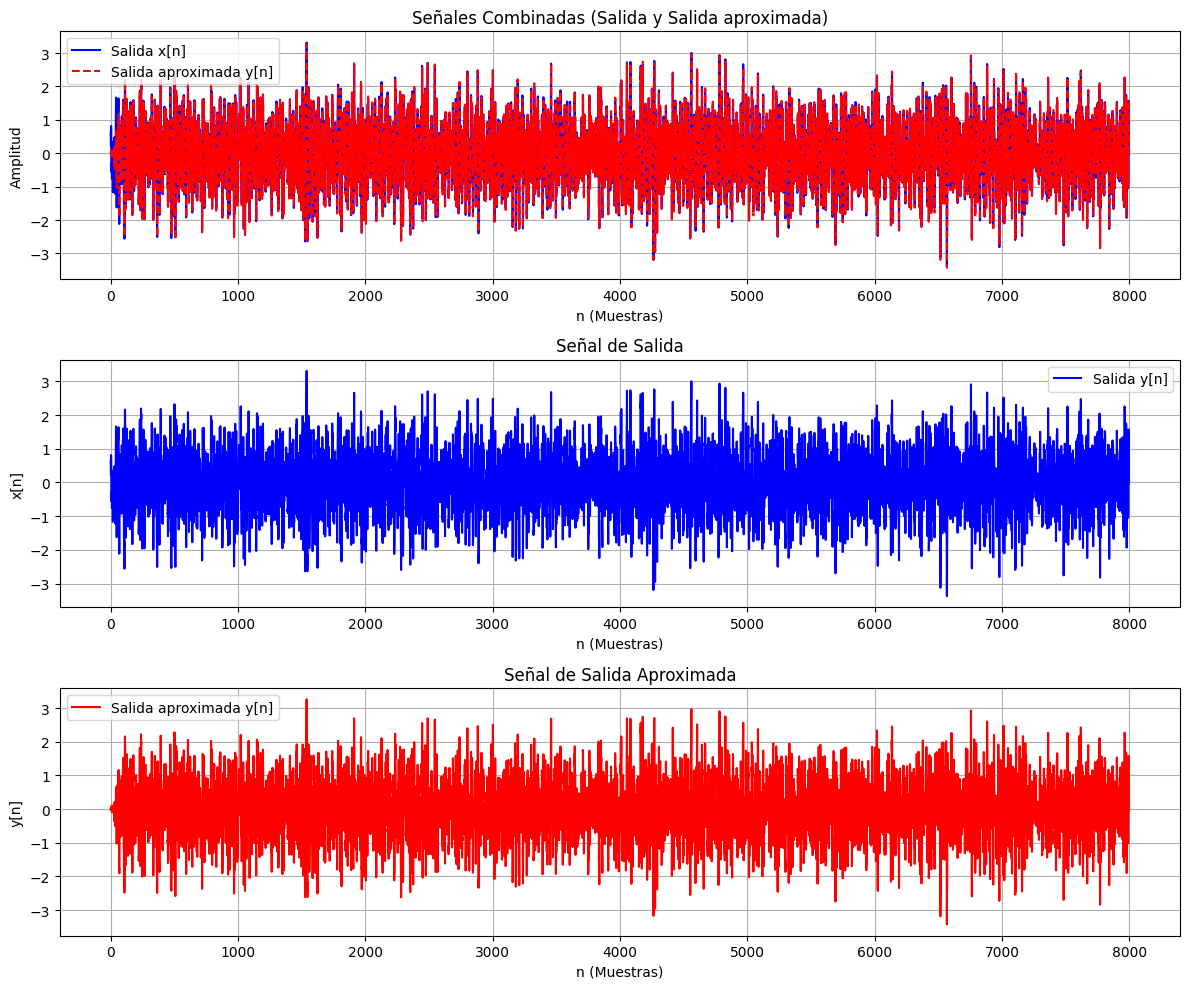

In [33]:
#Graficar señales recuperadas
n = np.arange(len(input_lti))
# Crear las gráficas
plt.figure(figsize=(12, 10))
# Gráfica 1: Señales combinadas (Entrada y Salida juntas)
plt.subplot(3, 1, 1)  # Primera gráfica (3 filas, 1 columna, posición 1)
plt.plot(n, output_lti, label='Salida x[n]', color='blue')
plt.plot(n, d_LMS, label='Salida aproximada y[n]', color='red', linestyle='--')
plt.title('Señales Combinadas (Salida y Salida aproximada)')
plt.xlabel('n (Muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
# Gráfica 2: Señal de Entrada x[n] (separada)
plt.subplot(3, 1, 2)  # Segunda gráfica (3 filas, 1 columna, posición 2)
plt.plot(n, output_lti, label='Salida y[n]', color='blue')
plt.title('Señal de Salida')
plt.xlabel('n (Muestras)')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
# Gráfica 3: Señal de Salida y[n] (separada)
plt.subplot(3, 1, 3)  # Tercera gráfica (3 filas, 1 columna, posición 3)
plt.plot(n, d_LMS, label='Salida aproximada y[n]', color='red')
plt.title('Señal de Salida Aproximada')
plt.xlabel('n (Muestras)')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
# Mostrar todas las gráficas
plt.show()

Caso 2 - Sistema lineal y variante en el tiempo (LTV - Linear Time Variant)

Dado un sistema LTV, la relación entre la entrada y la salida del sistema está dada por
y[n] =
Xn
k=−∞
x[k]h[n, k] + w[n]
donde h[n, k] es la respuesta impulsiva del sistema variante en el tiempo. Además, w[n]
es una señal de ruido blanco gaussiano con media cero. Analice el sistema de la siguiente
forma

a) Primero trate el sistema como un sistema LTI y utilice el filtro Wiener para encontrar
los coeficientes del sistema.

b) Luego, utilice el algoritmo LMS para identificar el sistema de forma adaptiva.

Conclusiones : 

Use un filtro FIR de longitud 10 para identificar el sistema. ¿Qué puede concluir sobre
las características del sistema LTV? ¿Qué opina sobre la performance del algoritmo LMS
comparado con la del filtro Wiener?